# Вычислительное музыковедение: Модели и методы Music Data Mining

## Лабораторная работа №3.  Классификация музыкальных данных методами классического МО

### Работа с данными

Полезные ссылки:
1. http://ismir2001.ismir.net/pdf/tzanetakis.pdf
2. https://huggingface.co/datasets/marsyas/gtzan

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

dataset = load_dataset("marsyas/gtzan")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for marsyas/gtzan contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/marsyas/gtzan
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.war

GTZAN is a dataset for musical genre classification of audio signals. The dataset consists of 1,000 audio tracks, each of 30 seconds long. It contains 10 genres, each represented by 100 tracks. The tracks are all 22,050Hz Mono 16-bit audio files in WAV format. The genres are: blues, classical, country, disco, hiphop, jazz, metal, pop, reggae, and rock.

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['file', 'audio', 'genre'],
        num_rows: 999
    })
})

In [ ]:
dataset['train'][998]

{'file': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/rock/rock.00099.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244/genres/rock/rock.00099.wav',
  'array': array([-0.02111816, -0.03451538, -0.03536987, ...,  0.00134277,
          0.00250244, -0.00186157]),
  'sampling_rate': 22050},
 'genre': 9}

In [ ]:
num2class = {
    0: 'blues',
    1: 'classical',
    2: 'country',
    3: 'disco',
    4: 'hiphop',
    5: 'jazz',
    6: 'metal',
    7: 'pop',
    8: 'reggae',
    9: 'rock'
}

In [ ]:
import IPython.display as ipd

idx = 555

print(dataset['train'][idx]['file'].split('/')[-1]) # num2class[...]
print(num2class.get(dataset['train'][idx]['genre'], 'Unknown')) # num2class[...]
ipd.Audio(dataset['train'][idx]['audio']['array'], rate=dataset['train'][idx]['audio']['sampling_rate'])

jazz.00056.wav
jazz


### Инстурмент Open SMILE

In [ ]:
!pip install opensmile

In [ ]:
signal = dataset['train'][idx]['audio']['array']
sr = dataset['train'][idx]['audio']['sampling_rate']

Извлекаемые множества признаки: https://audeering.github.io/opensmile-python/api/opensmile.FeatureSet.html

In [ ]:
import opensmile

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors,
)
smile.feature_names

['Loudness_sma3',
 'alphaRatio_sma3',
 'hammarbergIndex_sma3',
 'slope0-500_sma3',
 'slope500-1500_sma3',
 'spectralFlux_sma3',
 'mfcc1_sma3',
 'mfcc2_sma3',
 'mfcc3_sma3',
 'mfcc4_sma3',
 'F0semitoneFrom27.5Hz_sma3nz',
 'jitterLocal_sma3nz',
 'shimmerLocaldB_sma3nz',
 'HNRdBACF_sma3nz',
 'logRelF0-H1-H2_sma3nz',
 'logRelF0-H1-A3_sma3nz',
 'F1frequency_sma3nz',
 'F1bandwidth_sma3nz',
 'F1amplitudeLogRelF0_sma3nz',
 'F2frequency_sma3nz',
 'F2bandwidth_sma3nz',
 'F2amplitudeLogRelF0_sma3nz',
 'F3frequency_sma3nz',
 'F3bandwidth_sma3nz',
 'F3amplitudeLogRelF0_sma3nz']

In [ ]:
smile.process_signal(
    signal, sr
)

,,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
start,end,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0 days 00:00:00.020000,2.749688,-6.319524,12.926682,0.035185,-0.021128,0.230870,17.279427,-4.456493,-1.564100,-2.608831,...,0.000000,367.197845,1230.190063,-201.000000,1326.028564,984.650574,-201.000000,2291.287354,840.537109,-201.000000
0 days 00:00:00.010022676,0 days 00:00:00.030022676,2.664259,-6.060410,12.390781,0.048338,-0.013518,0.698125,17.535757,-4.635832,0.265890,-0.468290,...,0.000000,336.123901,1405.411133,-201.000000,1298.323853,1093.420532,-201.000000,2250.147705,941.644287,-201.000000
0 days 00:00:00.020045351,0 days 00:00:00.040045351,2.578699,-6.156704,11.859790,0.028208,-0.011891,1.247118,17.906931,-3.979409,2.705081,1.280313,...,0.000000,357.640869,1343.226196,-201.000000,1322.024902,1067.249512,-201.000000,2250.310547,930.184814,-201.000000
0 days 00:00:00.030068027,0 days 00:00:00.050068027,2.746371,-6.311854,12.400386,0.010640,-0.009388,1.908795,16.465799,-2.669293,5.342227,3.830827,...,0.000000,394.594574,1329.542358,-201.000000,1352.643188,1124.815430,-201.000000,2227.950195,1011.295898,-201.000000
0 days 00:00:00.040090703,0 days 00:00:00.060090703,3.052687,-6.865738,14.324033,-0.017458,-0.009893,2.319264,16.938204,-1.578225,4.794478,4.478996,...,0.000000,451.975342,1171.932617,-201.000000,1372.590820,1078.056274,-201.000000,2249.025146,937.197083,-201.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 00:00:30.078049887,0 days 00:00:30.098049887,2.378054,-11.361815,15.670215,-0.018722,-0.027502,1.731772,19.560427,5.864205,1.930068,-3.668364,...,0.000000,465.177460,1081.790283,-201.000000,1502.315552,1193.354004,-201.000000,2218.626465,1154.457764,-201.000000
0 days 00:00:30.088072562,0 days 00:00:30.108072562,2.297016,-11.841785,14.727231,-0.019482,-0.025816,1.742212,19.989901,6.342255,2.327210,-5.343468,...,14.296519,431.574463,1344.768066,-5.019070,1252.105103,1379.262085,-11.342674,2223.029297,719.600891,-14.246460
0 days 00:00:30.098095238,0 days 00:00:30.118095238,2.252993,-12.977253,15.905670,-0.023325,-0.028424,1.972220,21.734243,7.520571,5.038730,-5.983995,...,15.504300,420.757904,1394.576660,-3.931054,1222.255249,1368.629761,-10.746339,2240.863281,681.218811,-14.474510


In [ ]:
smile = opensmile.Smile()
result = smile.process_signal(
    signal, sr
)
result

,,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
start,end,,,,,,,,,,,,,,,,,,,,,
0 days,0 days 00:00:30.171428571,3.035437,0.969031,0.043623,1.902808,2.294646,2.656062,0.391838,0.361416,0.753254,1.063612,...,8.713185,0.453329,2.483271,2.490195,-19.98317,0.642485,102.2127,52.857243,101.932732,51.886269


In [ ]:
feat_names = result.columns.values
feat_names

array(['audspec_lengthL1norm_sma_range',
       'audspec_lengthL1norm_sma_maxPos',
       'audspec_lengthL1norm_sma_minPos', ...,
       'mfcc_sma_de[14]_stddevRisingSlope',
       'mfcc_sma_de[14]_meanFallingSlope',
       'mfcc_sma_de[14]_stddevFallingSlope'], dtype=object)

In [ ]:
result.to_numpy()

array([[3.0354371e+00, 9.6903098e-01, 4.3623045e-02, ..., 5.2857243e+01,
        1.0193273e+02, 5.1886269e+01]], dtype=float32)

### Подготовка датасета

In [ ]:
from tqdm import tqdm

smile = opensmile.Smile()

prepared_data = []

for idx in tqdm(range(len(dataset['train']))):
    signal = dataset['train'][idx]['audio']['array']
    sr = dataset['train'][idx]['audio']['sampling_rate']
    genre = dataset['train'][idx]['genre']
    features = smile.process_signal(signal, sr).to_numpy()[0]
    prepared_data.append({
        'id': idx,
        'features': features,
        'genre': genre
    })


In [ ]:
import numpy as np
# Сохранить
file_name = 'smile_features.npy'
np.save(file_name, prepared_data, allow_pickle=True) # Не забудьте закомментировать, чтобы не перезаписать или еще что.

# Извлечь
data = np.load(file_name, allow_pickle=True)
len(data)

999

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=111)

In [ ]:
len(train_data), len(test_data)

(699, 300)

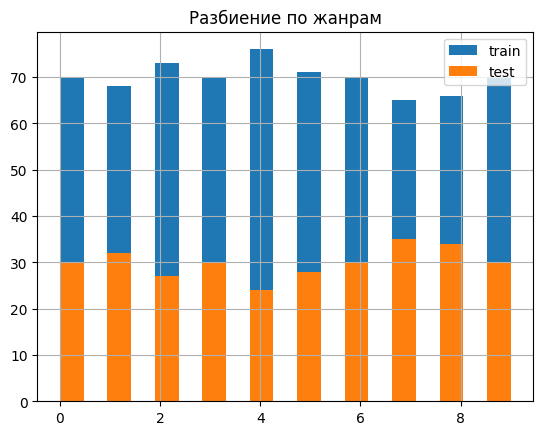

In [ ]:
import matplotlib.pyplot as plt

plt.hist([elem['genre'] for elem in train_data], 19, label='train')
plt.hist([elem['genre'] for elem in test_data], 19, label='test')
plt.legend()
plt.title('Разбиение по жанрам')
plt.grid()
plt.show()

### Классификация

Больше информации: https://scikit-learn.org/stable/modules/classes.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


tree_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    random_state=111
)
tree_clf

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=111)

In [ ]:
tree_clf.fit([elem['features'] for elem in train_data], [elem['genre'] for elem in train_data])

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=111)

#### Как можно посмотреть на решающие правила

In [ ]:
ruls = tree.export_text(tree_clf)
print(ruls)

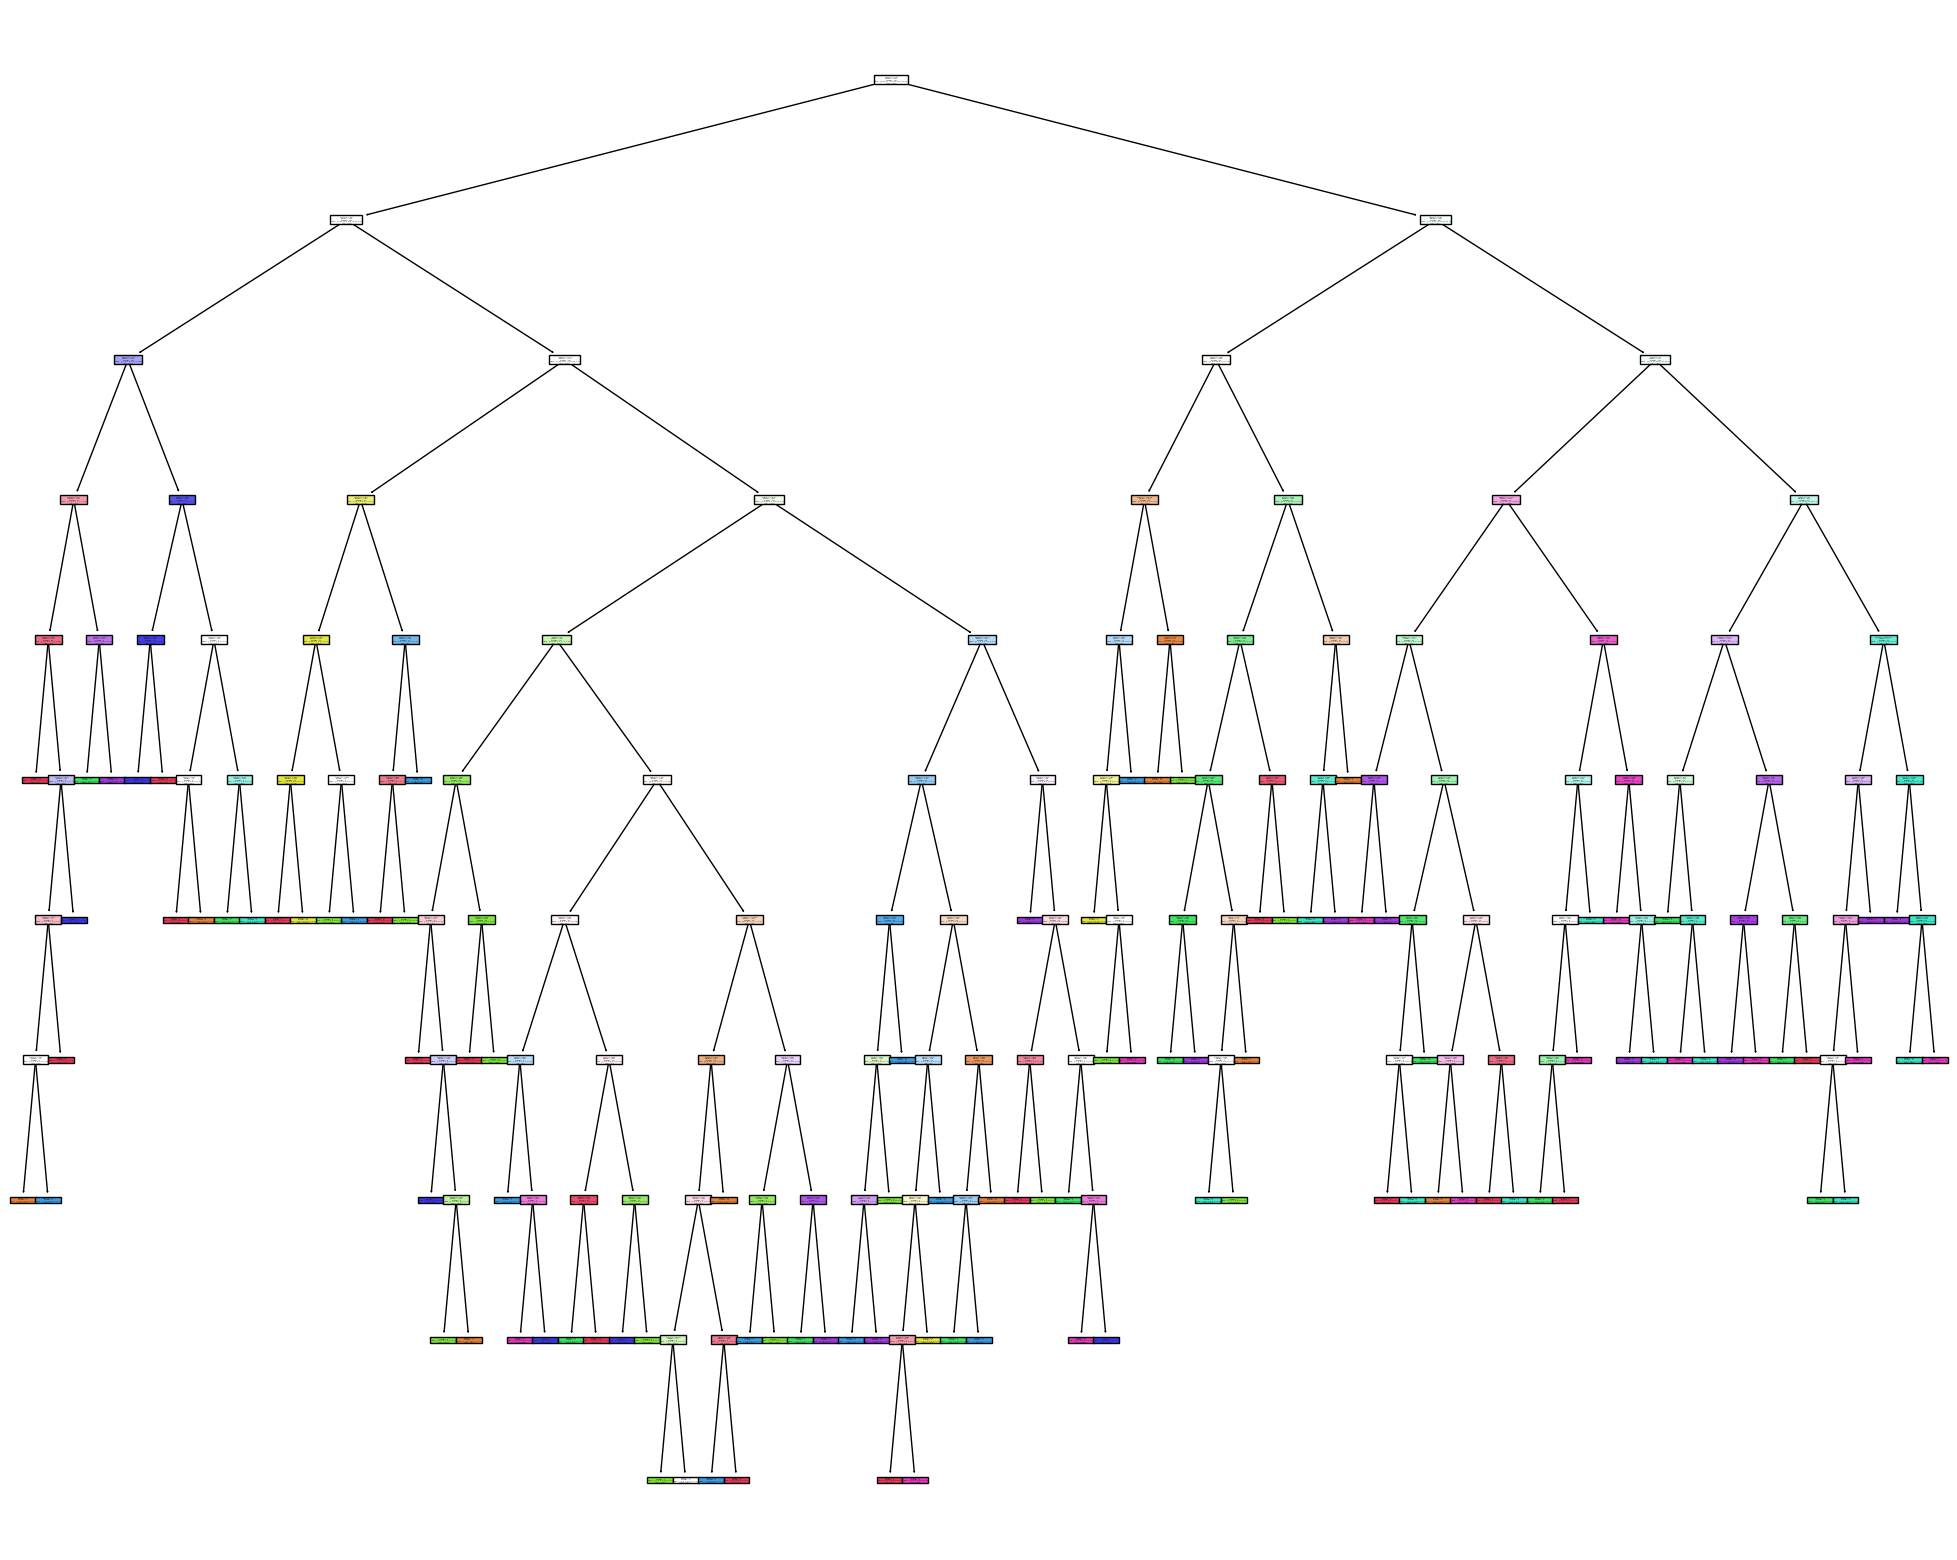

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,
                   feature_names=None,
                   class_names=list(num2class.values()),
                   filled=True)


#### Аналитика результатов

In [ ]:
real_class = [elem['genre'] for elem in test_data]
predict_result = list(tree_clf.predict([elem['features'] for elem in test_data]))

https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(real_class, predict_result)

0.5333333333333333

In [ ]:
from sklearn.metrics import recall_score

recall_score(real_class, predict_result, average='micro'), recall_score(real_class, predict_result, average='macro')

(0.5333333333333333, 0.5360562558356675)

In [ ]:
from sklearn.metrics import precision_score

precision_score(real_class, predict_result, average='micro'), precision_score(real_class, predict_result, average='macro')

(0.5333333333333333, 0.5553289822241382)

In [ ]:
from sklearn.metrics import f1_score

f1_score(real_class, predict_result, average='micro'), f1_score(real_class, predict_result, average='macro')

(0.5333333333333333, 0.5410403151584664)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(real_class, predict_result))

              precision    recall  f1-score   support

           0       0.45      0.47      0.46        30
           1       0.93      0.81      0.87        32
           2       0.54      0.56      0.55        27
           3       0.33      0.47      0.38        30
           4       0.52      0.62      0.57        24
           5       0.70      0.57      0.63        28
           6       0.69      0.67      0.68        30
           7       0.56      0.40      0.47        35
           8       0.62      0.53      0.57        34
           9       0.23      0.27      0.25        30

    accuracy                           0.53       300
   macro avg       0.56      0.54      0.54       300
weighted avg       0.56      0.53      0.54       300



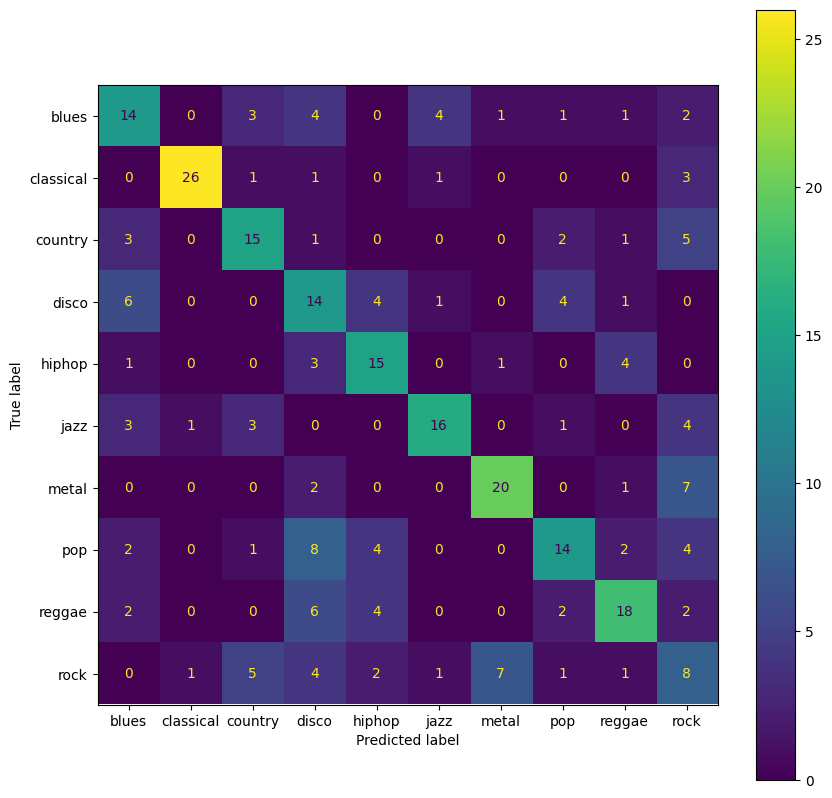

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_name = [num2class[i] for i in real_class]
y_pred_name = [num2class[i] for i in predict_result]


plt.rcParams['figure.figsize'] = [10, 10]
cm = confusion_matrix(y_true_name, y_pred_name, labels=list(num2class.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(num2class.values()))
disp.plot()
plt.show()

### Задание на лабораторную работу (10 баллов)

1. Произвести подготовку данных (извлечь признаки с помощью open SMILE)
2. Обучить 3 различных классификатора (для каждого классификатора поиграться с гиперпараметрами, 2 эксперимента на классификатор)
3. Расчитать метрики: acc, f-1 и третья - на ваш выбор
4. Для каждого эксперемента произвести анализ confuision matrix
5. В конце создать итоговую таблицу с эксперминетами и результатами. Сделать выводы.
6. Цель - получить метрику классификации выше, чем в примере.

In [ ]:
!wget "https://www.dropbox.com/scl/fi/n7goyj490phygdnazply2/smile_features.npy?rlkey=3x5dkhb7ykmke40y7p6qkd5r0&dl=0" -O smile_features.npy

--2024-04-23 09:39:00--  https://www.dropbox.com/scl/fi/n7goyj490phygdnazply2/smile_features.npy?rlkey=3x5dkhb7ykmke40y7p6qkd5r0&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd4213441a85ed89267b816e208.dl.dropboxusercontent.com/cd/0/inline/CRg5R6rBNjB1iOsjqSTOZ3vhMn5zPYTIYjZ_rtl-N68n2_QVC0zQLZ5hYTFBtR3MfzfVxWrsLCzucHgyJjuIn5ws8nrOJr5GmCxGAgGZ6A_1YiNMD_47bKgdDaICOkkx3t6wpClIWLLqwMBMfflemFy8/file# [following]
--2024-04-23 09:39:01--  https://ucd4213441a85ed89267b816e208.dl.dropboxusercontent.com/cd/0/inline/CRg5R6rBNjB1iOsjqSTOZ3vhMn5zPYTIYjZ_rtl-N68n2_QVC0zQLZ5hYTFBtR3MfzfVxWrsLCzucHgyJjuIn5ws8nrOJr5GmCxGAgGZ6A_1YiNMD_47bKgdDaICOkkx3t6wpClIWLLqwMBMfflemFy8/file
Resolving ucd4213441a85ed89267b816e208.dl.dropboxusercontent.com (ucd4213441a85ed89267b816e208.dl.dropboxusercontent.com)... 162.125.

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 3.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import catboost as cb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


SEED = 42

In [ ]:
data = np.load('smile_features.npy', allow_pickle=True)
data[:5]

array([{'id': 0, 'features': array([  3.0772326 ,   0.66488117,   0.20857047, ...,  50.88457   ,
              101.54951   ,  51.351048  ], dtype=float32), 'genre': 0}                          ,
       {'id': 1, 'features': array([2.9191518e+00, 8.4030800e-02, 1.8747907e-02, ..., 5.1134155e+01,
              9.4596451e+01, 5.2037270e+01], dtype=float32), 'genre': 0}                            ,
       {'id': 2, 'features': array([ 4.276291 ,  0.9758955,  0.5952461, ..., 50.3021   , 96.13825  ,
              53.04488  ], dtype=float32), 'genre': 0}                                              ,
       {'id': 3, 'features': array([ 3.033263,  0.407767,  0.361232, ..., 45.567436, 81.05081 ,
              46.412945], dtype=float32), 'genre': 0}                                          ,
       {'id': 4, 'features': array([3.89178252e+00, 1.07800469e-01, 2.10244387e-01, ...,
              7.30443115e+01, 1.20490204e+02, 6.69636536e+01], dtype=float32), 'genre': 0}],
      dtype=object)

In [ ]:
columns = {}
for i in range(len(data)):
    for col in list(data[0].keys()):
        columns[col] = columns.get(col, []) + [data[i][col]]
pd.DataFrame(columns)

,id,features,genre
0,0,"[3.0772326, 0.66488117, 0.20857047, 1.2164695,...",0
1,1,"[2.9191518, 0.0840308, 0.018747907, 0.5758705,...",0
2,2,"[4.276291, 0.9758955, 0.5952461, 1.5694044, 2....",0
3,3,"[3.033263, 0.407767, 0.361232, 0.6814244, 0.93...",0
4,4,"[3.8917825, 0.10780047, 0.21024439, 0.9664927,...",0
...,...,...,...
994,994,"[2.2261524, 0.5791764, 0.4603281, 1.0797393, 1...",9
995,995,"[2.103307, 0.5510546, 0.25477067, 1.1665366, 1...",9
996,996,"[2.2279406, 0.63173753, 0.076330766, 1.3615429...",9
997,997,"[2.1116304, 0.67157686, 0.877469, 0.6875328, 1...",9


In [ ]:
X = pd.DataFrame(np.array(columns['features']), columns=feat_names)
y = np.array(columns['genre'])
X

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,3.077233,0.664881,0.208570,1.216470,1.670476,2.170917,0.454007,0.500441,0.954448,0.685500,...,8.826405,0.598435,2.262476,2.262029,20.000000,0.574503,104.534561,50.884571,101.549507,51.351048
1,2.919152,0.084031,0.018748,0.575871,0.931626,1.406546,0.355756,0.474920,0.830675,0.156133,...,7.274529,0.534391,2.067764,2.069380,-19.999981,0.548862,97.023972,51.134155,94.596451,52.037270
2,4.276291,0.975896,0.595246,1.569404,2.136696,2.713108,0.567291,0.576412,1.143703,0.572410,...,9.040579,0.519204,2.260218,2.262507,-19.999889,0.570997,98.043129,50.302101,96.138252,53.044880
3,3.033263,0.407767,0.361232,0.681424,0.935096,1.287812,0.253672,0.352716,0.606388,0.274822,...,8.179142,0.615489,1.831717,1.832065,-20.000000,0.496917,86.788780,45.567436,81.050812,46.412945
4,3.891783,0.107800,0.210244,0.966493,1.441894,2.004727,0.475401,0.562833,1.038234,0.326278,...,12.215757,0.559186,3.168010,3.168862,-20.000000,0.443260,128.189026,73.044312,120.490204,66.963654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2.226152,0.579176,0.460328,1.079739,1.345254,1.561673,0.265514,0.216420,0.481934,0.636265,...,6.946154,0.558880,2.076641,2.081009,-19.994717,0.618359,95.202690,45.530170,92.854919,46.703346
995,2.103307,0.551055,0.254771,1.166537,1.488459,1.704164,0.321922,0.215705,0.537627,0.333026,...,7.295958,0.686410,1.892969,1.895147,-19.999760,0.606396,89.733986,47.243790,91.056175,46.614132
996,2.227941,0.631738,0.076331,1.361543,1.595891,1.894417,0.234348,0.298526,0.532874,0.655948,...,6.991026,0.606613,1.892643,1.885013,19.938690,0.597558,88.858421,45.774021,91.874916,47.620510
997,2.111630,0.671577,0.877469,0.687533,1.017320,1.304749,0.329787,0.287429,0.617216,0.111102,...,6.208370,0.474156,1.979217,1.979108,20.000000,0.610649,92.234238,48.099636,89.950905,46.326664


In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 2.2306487e-02,  3.8149515e-01, -7.2667903e-01, ...,
        -1.9121586e-01,  1.5723011e-01, -9.1175206e-02],
       [-1.1753985e-01, -1.5887617e+00, -1.3495038e+00, ...,
        -1.5820868e-01, -3.8505417e-01, -1.3791653e-03],
       [ 1.0830545e+00,  1.4364625e+00,  5.4203802e-01, ...,
        -2.6824671e-01, -2.6480564e-01,  1.3047235e-01],
       ...,
       [-7.2902048e-01,  2.6907122e-01, -1.1605693e+00, ...,
        -8.6707908e-01, -5.9731269e-01, -5.7933712e-01],
       [-8.3191431e-01,  4.0420708e-01,  1.4680365e+00, ...,
        -5.5951971e-01, -7.4737054e-01, -7.4864423e-01],
       [-4.7306907e-01, -1.0368627e+00, -6.6077167e-01, ...,
        -1.3422921e+00, -9.3418425e-01, -9.2411214e-01]], dtype=float32)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=SEED)

## CatBoost

In [ ]:
weak_model = cb.CatBoostClassifier(iterations=20,
                                  loss_function='MultiClass',
                                  random_seed=SEED,
                                  max_depth=5)

pool_train, pool_val = cb.Pool(X_train, y_train), cb.Pool(X_val, y_val)
weak_model.fit(pool_train, eval_set=pool_val, plot=False, verbose=1)

In [ ]:
ftt = weak_model.get_feature_importance(prettified=True)
good_ft = ftt['Feature Id'][ftt['Importances'] >= 0.5]
good_ft

0     5131
1     1162
2      561
3     6314
4     2148
      ... 
62    1078
63    5515
64    4014
65    3907
66    6196
Name: Feature Id, Length: 67, dtype: object

In [ ]:
ftt.sort_values(by=['Importances'], ascending=False, inplace=True)
ftt.reset_index(inplace=True, drop=True)
ftt[ftt['Importances'] >= 0.5]

,Feature Id,Importances
0,5131,5.668676
1,1162,5.547320
2,561,5.113182
3,6314,4.969458
4,2148,4.141803
...,...,...
62,1078,0.532704
63,5515,0.527540
64,4014,0.520760
65,3907,0.520605


In [ ]:
good_ft

In [ ]:
good_ft = list(map(int, good_ft.values))
X_train_small, X_val_small = X_train[good_ft], X_val[good_ft]
X_train_small

In [ ]:
model = cb.CatBoostClassifier(iterations=200,
                              loss_function='MultiClass',
                              random_seed=SEED,
                              max_depth=5)

pool_train, pool_val = cb.Pool(X_train_small, y_train), cb.Pool(X_val_small, y_val)
model.fit(pool_train, eval_set=pool_val, plot=False, verbose=20)

In [ ]:
preds_train = model.predict(X_train_small)
preds_val = model.predict(X_val_small)
preds_val[:10]

array([[4],
       [7],
       [6],
       [3],
       [2],
       [5],
       [8],
       [5],
       [8],
       [3]])

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print('=== CatBoost metrics ===')
print('Accuracy:', accuracy_score(y_val, preds_val))
print('Precision:', precision_score(y_val, preds_val, average='micro'), precision_score(y_val, preds_val, average='macro'))
print('Recall:', recall_score(y_val, preds_val, average='micro'), recall_score(y_val, preds_val, average='macro'))
print('F1:', f1_score(y_val, preds_val, average='micro'), f1_score(y_val, preds_val, average='macro'))

=== CatBoost metrics ===
Accuracy: 0.8
Precision: 0.8 0.7991452801782313
Recall: 0.8 0.8041724260145312
F1: 0.8000000000000002 0.7981808606918034


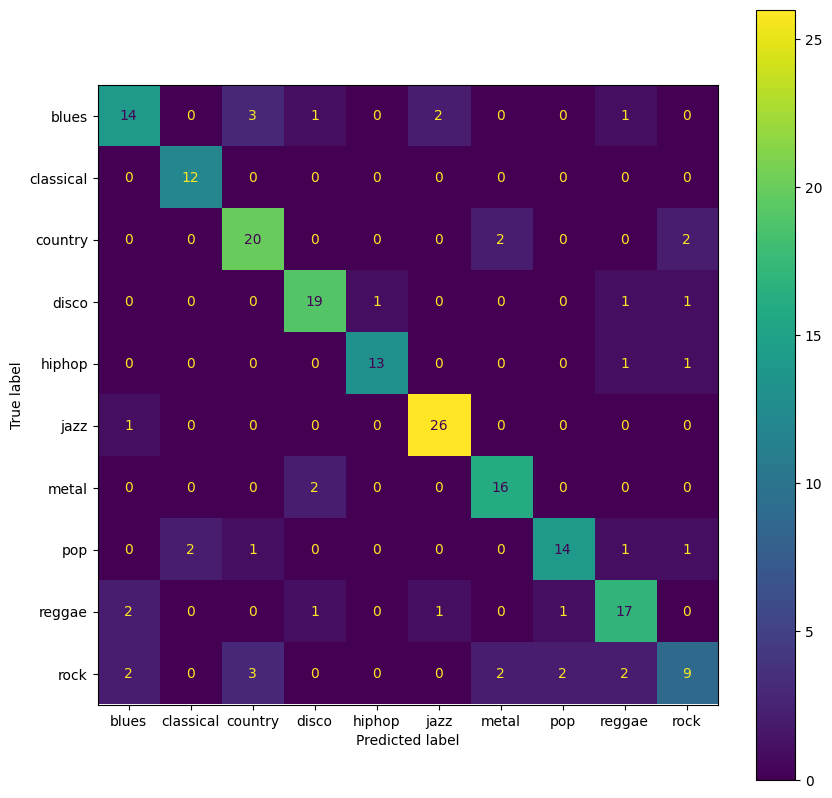

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_name = [num2class[i] for i in y_val]
y_pred_name = [num2class[i[0]] for i in preds_val]


plt.rcParams['figure.figsize'] = [10, 10]
cm = confusion_matrix(y_true_name, y_pred_name, labels=list(num2class.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(num2class.values()))
disp.plot()
plt.show()

In [ ]:
model = cb.CatBoostClassifier(iterations=500,
                              loss_function='MultiClass',
                              random_seed=SEED,
                              max_depth=7,)

pool_train, pool_val = cb.Pool(X_train_small, y_train), cb.Pool(X_val_small, y_val)
model.fit(pool_train, eval_set=pool_val, plot=False, verbose=50)

Learning rate set to 0.140079
0:	learn: 2.1525379	test: 2.2028412	best: 2.2028412 (0)	total: 526ms	remaining: 4m 22s
50:	learn: 0.5197874	test: 1.0012173	best: 1.0012173 (50)	total: 16s	remaining: 2m 20s
100:	learn: 0.2614424	test: 0.8200763	best: 0.8200763 (100)	total: 27.8s	remaining: 1m 49s
150:	learn: 0.1628459	test: 0.7526346	best: 0.7526346 (150)	total: 40.8s	remaining: 1m 34s
200:	learn: 0.1117459	test: 0.7198666	best: 0.7198666 (200)	total: 53.6s	remaining: 1m 19s
250:	learn: 0.0824831	test: 0.7008087	best: 0.7008087 (250)	total: 1m 14s	remaining: 1m 13s
300:	learn: 0.0637850	test: 0.6884738	best: 0.6880959 (298)	total: 1m 34s	remaining: 1m 2s
350:	learn: 0.0506877	test: 0.6771025	best: 0.6770893 (349)	total: 2m 1s	remaining: 51.5s
400:	learn: 0.0428032	test: 0.6688620	best: 0.6688620 (400)	total: 2m 16s	remaining: 33.7s
450:	learn: 0.0367308	test: 0.6619643	best: 0.6619643 (450)	total: 2m 28s	remaining: 16.1s
499:	learn: 0.0317812	test: 0.6571718	best: 0.6569982 (498)	total: 2

In [ ]:
preds_train = model.predict(X_train_small)
preds_val = model.predict(X_val_small)
preds_val[:10]

array([[4],
       [7],
       [6],
       [3],
       [2],
       [5],
       [8],
       [5],
       [8],
       [9]])

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print('=== (bigger) CatBoost metrics ===')
print('Accuracy:', accuracy_score(y_val, preds_val))
print('Precision:', precision_score(y_val, preds_val, average='micro'), precision_score(y_val, preds_val, average='macro'))
print('Recall:', recall_score(y_val, preds_val, average='micro'), recall_score(y_val, preds_val, average='macro'))
print('F1:', f1_score(y_val, preds_val, average='micro'), f1_score(y_val, preds_val, average='macro'))

=== (bigger) CatBoost metrics ===
Accuracy: 0.815
Precision: 0.815 0.8177630118419593
Recall: 0.815 0.8214678109414951
F1: 0.815 0.8189407404657789


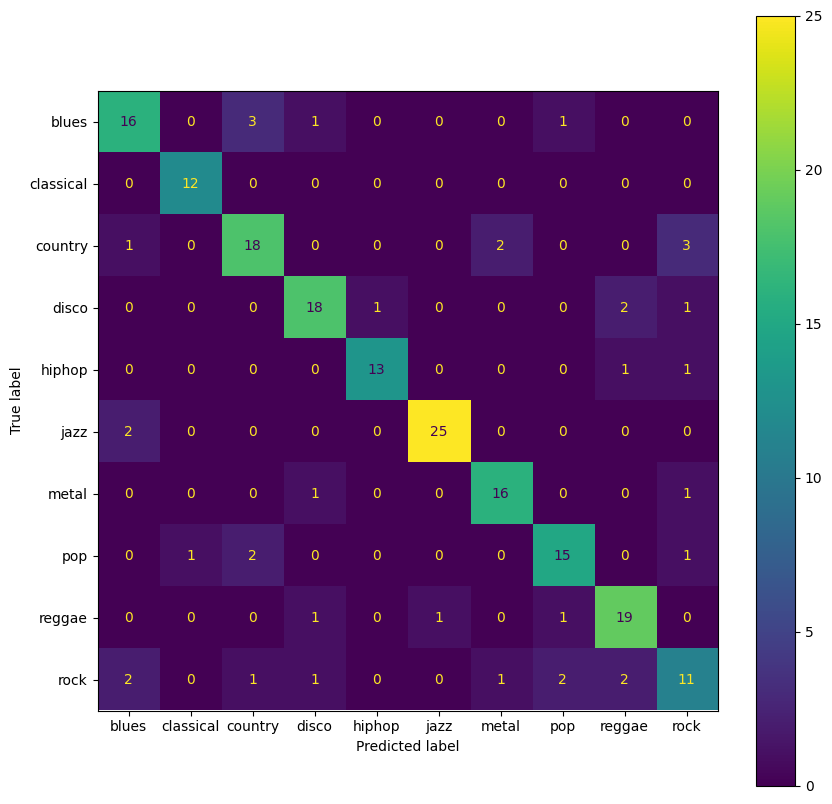

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_name = [num2class[i] for i in y_val]
y_pred_name = [num2class[i[0]] for i in preds_val]


plt.rcParams['figure.figsize'] = [10, 10]
cm = confusion_matrix(y_true_name, y_pred_name, labels=list(num2class.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(num2class.values()))
disp.plot()
plt.show()

In [ ]:
X_train

array([[-1.6479894 , -0.5549289 , -0.18363068, ...,  0.03230381,
         0.05488913,  0.44027418],
       [ 0.00992248, -1.4922361 ,  0.14769217, ..., -0.72663105,
         0.24495648,  0.6204014 ],
       [-1.4994296 ,  1.4682592 , -1.0166715 , ..., -1.1592531 ,
        -0.92260134, -0.5244524 ],
       ...,
       [ 0.35063878,  0.944558  ,  1.5173491 , ...,  1.5328977 ,
         1.4612185 ,  1.4408664 ],
       [ 0.6490132 ,  1.1122175 ,  0.6799153 , ...,  0.4959726 ,
         1.2985321 ,  1.0832486 ],
       [-1.6873505 , -1.7693212 ,  0.23666716, ...,  0.59805584,
         0.19626074,  0.76122606]], dtype=float32)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,
                           weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
preds_val = knn.predict(X_val)
preds_val[:10]

array([4, 7, 9, 3, 0, 9, 8, 5, 4, 6])

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print('=== Uniform distance KNN metrics ===')
print('Accuracy:', accuracy_score(y_val, preds_val))
print('Precision:', precision_score(y_val, preds_val, average='micro'), precision_score(y_val, preds_val, average='macro'))
print('Recall:', recall_score(y_val, preds_val, average='micro'), recall_score(y_val, preds_val, average='macro'))
print('F1:', f1_score(y_val, preds_val, average='micro'), f1_score(y_val, preds_val, average='macro'))

=== Uniform distance KNN metrics ===
Accuracy: 0.745
Precision: 0.745 0.7821595047317608
Recall: 0.745 0.7491964760385812
F1: 0.745 0.7580563683993535


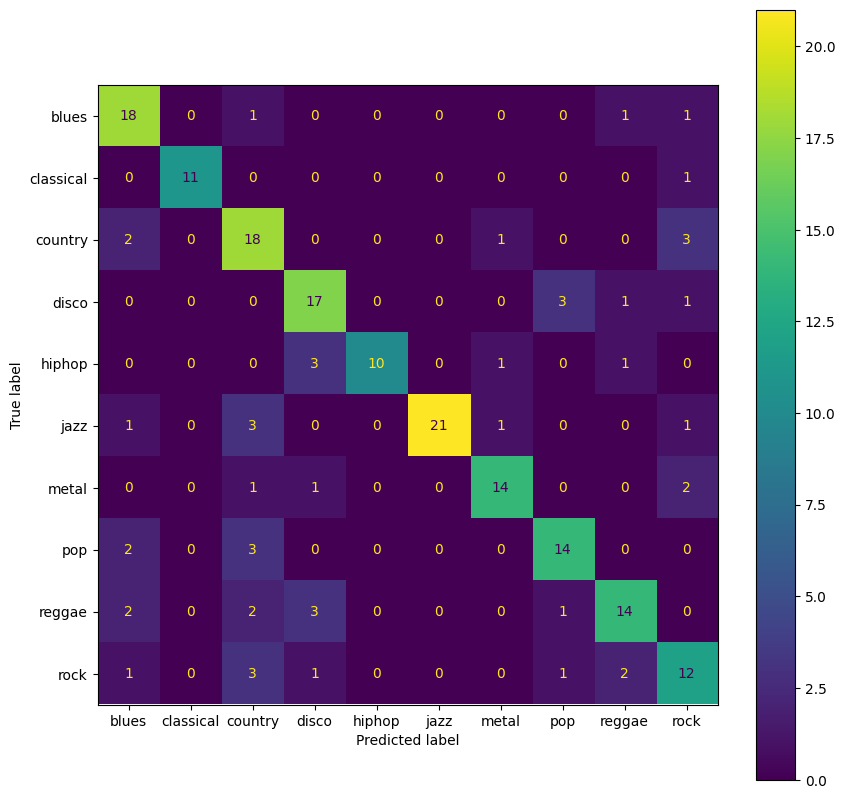

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_name = [num2class[i] for i in y_val]
y_pred_name = [num2class[i] for i in preds_val]


plt.rcParams['figure.figsize'] = [10, 10]
cm = confusion_matrix(y_true_name, y_pred_name, labels=list(num2class.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(num2class.values()))
disp.plot()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7,
                           weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
preds_val = knn.predict(X_val)
preds_val[:10]

array([4, 7, 2, 3, 0, 9, 8, 5, 4, 6])

In [ ]:
print('=== Euclidean distance KNN metrics ===')
print('Accuracy:', accuracy_score(y_val, preds_val))
print('Precision:', precision_score(y_val, preds_val, average='micro'), precision_score(y_val, preds_val, average='macro'))
print('Recall:', recall_score(y_val, preds_val, average='micro'), recall_score(y_val, preds_val, average='macro'))
print('F1:', f1_score(y_val, preds_val, average='micro'), f1_score(y_val, preds_val, average='macro'))

=== Euclidean distance KNN metrics ===
Accuracy: 0.765
Precision: 0.765 0.7937171238372611
Recall: 0.765 0.7678771423508266
F1: 0.765 0.7747551344192939


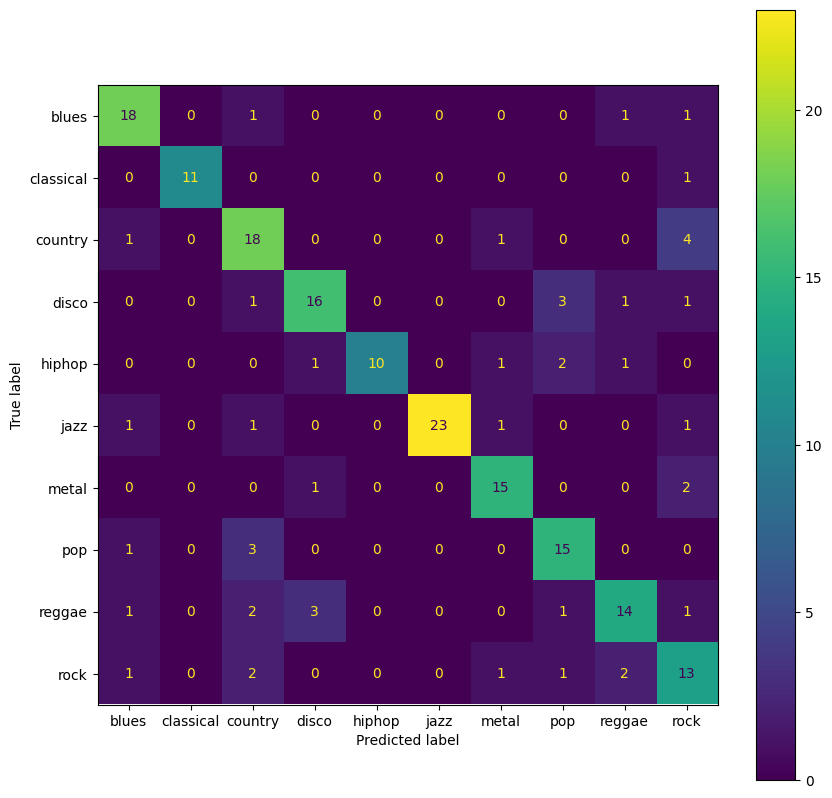

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_name = [num2class[i] for i in y_val]
y_pred_name = [num2class[i] for i in preds_val]


plt.rcParams['figure.figsize'] = [10, 10]
cm = confusion_matrix(y_true_name, y_pred_name, labels=list(num2class.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(num2class.values()))
disp.plot()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,
                           weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
print('=== New KNN metrics ===')
print('Accuracy:', accuracy_score(y_val, preds_val))
print('Precision:', precision_score(y_val, preds_val, average='micro'), precision_score(y_val, preds_val, average='macro'))
print('Recall:', recall_score(y_val, preds_val, average='micro'), recall_score(y_val, preds_val, average='macro'))
print('F1:', f1_score(y_val, preds_val, average='micro'), f1_score(y_val, preds_val, average='macro'))

=== New KNN metrics ===
Accuracy: 0.765
Precision: 0.765 0.7937171238372611
Recall: 0.765 0.7678771423508266
F1: 0.765 0.7747551344192939


## LogReg

### Basic logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
preds_val = logreg.predict(X_val)
preds_val[:10]

array([4, 7, 6, 3, 2, 5, 8, 5, 4, 6])

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

print('=== Basic logistic regression metrics ===')
print('Accuracy:', accuracy_score(y_val, preds_val))
print('Precision:', precision_score(y_val, preds_val, average='micro'), precision_score(y_val, preds_val, average='macro'))
print('Recall:', recall_score(y_val, preds_val, average='micro'), recall_score(y_val, preds_val, average='macro'))
print('F1:', f1_score(y_val, preds_val, average='micro'), f1_score(y_val, preds_val, average='macro'))

=== Basic logistic regression metrics ===
Accuracy: 0.855
Precision: 0.855 0.8672715089170465
Recall: 0.855 0.8590303410040253
F1: 0.855 0.8609274472679835


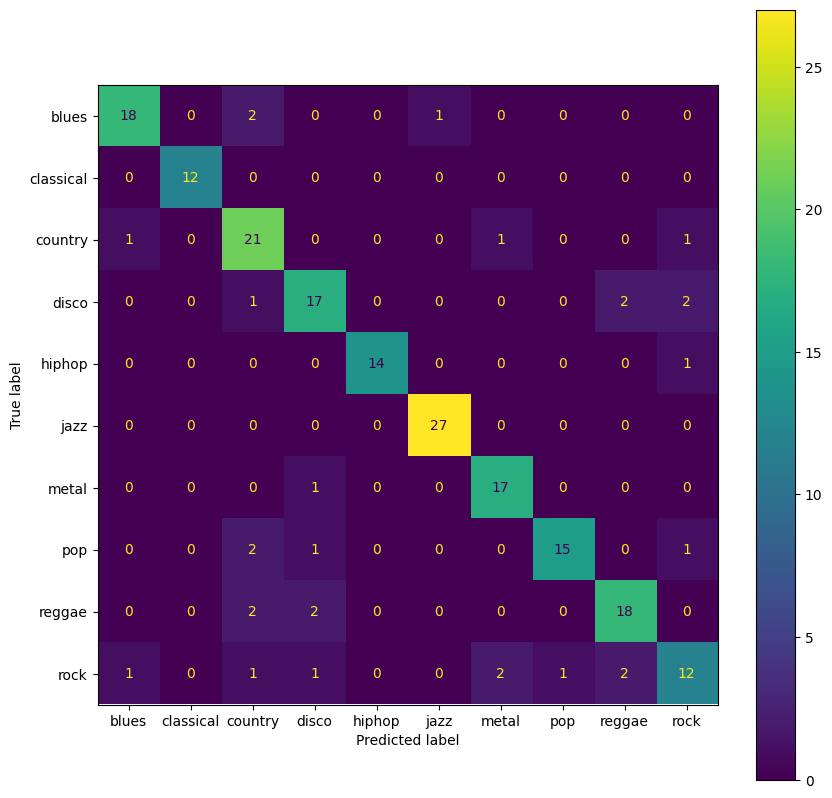

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true_name = [num2class[i] for i in y_val]
y_pred_name = [num2class[i] for i in preds_val]


plt.rcParams['figure.figsize'] = [10, 10]
cm = confusion_matrix(y_true_name, y_pred_name, labels=list(num2class.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(num2class.values()))
disp.plot()
plt.show()

### Logistic regression ensemble

In [ ]:
models = []

for solver in ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
    print(f'=== Training with {solver} solver ===')
    model = LogisticRegression(solver=solver).fit(X_train, y_train)
    preds_val = model.predict(X_val)
    print('Accuracy:', accuracy_score(y_val, preds_val))
    print('Precision:', precision_score(y_val, preds_val, average='micro'), precision_score(y_val, preds_val, average='macro'))
    print('Recall:', recall_score(y_val, preds_val, average='micro'), recall_score(y_val, preds_val, average='macro'))
    print('F1:', f1_score(y_val, preds_val, average='micro'), f1_score(y_val, preds_val, average='macro'))
    models.append(model)

=== Training with liblinear solver ===
Accuracy: 0.855
Precision: 0.855 0.8672715089170465
Recall: 0.855 0.8590303410040253
F1: 0.855 0.8609274472679835
=== Training with newton-cg solver ===


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Accuracy: 0.855
Precision: 0.855 0.8672715089170465
Recall: 0.855 0.8590303410040253
F1: 0.855 0.8609274472679835
=== Training with newton-cholesky solver ===
Accuracy: 0.855
Precision: 0.855 0.8672715089170465
Recall: 0.855 0.8590303410040253
F1: 0.855 0.8609274472679835
=== Training with sag solver ===


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.855
Precision: 0.855 0.8672715089170465
Recall: 0.855 0.8590303410040253
F1: 0.855 0.8609274472679835
=== Training with saga solver ===
Accuracy: 0.855
Precision: 0.855 0.8672715089170465
Recall: 0.855 0.8590303410040253
F1: 0.855 0.8609274472679835


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC(C=1.0, max_iter=1000)
svc.fit(X_train, y_train)

SVC(max_iter=1000)

In [ ]:
preds_val = logreg.predict(X_val)
preds_val[:10]

array([4, 7, 6, 3, 2, 5, 8, 5, 4, 6])

In [ ]:
print('=== SVC RBF metrics ===')
print('Accuracy:', accuracy_score(y_val, preds_val))
print('Precision:', precision_score(y_val, preds_val, average='micro'), precision_score(y_val, preds_val, average='macro'))
print('Recall:', recall_score(y_val, preds_val, average='micro'), recall_score(y_val, preds_val, average='macro'))
print('F1:', f1_score(y_val, preds_val, average='micro'), f1_score(y_val, preds_val, average='macro'))

=== SVC RBF metrics ===
Accuracy: 0.855
Precision: 0.855 0.8672715089170465
Recall: 0.855 0.8590303410040253
F1: 0.855 0.8609274472679835


In [ ]:
from sklearn.svm import SVC

svc = SVC(C=100.0, max_iter=1000)
svc.fit(X_train, y_train)

SVC(C=100.0, max_iter=1000)

In [ ]:
preds_val = logreg.predict(X_val)
preds_val[:10]

array([4, 7, 6, 3, 2, 5, 8, 5, 4, 6])

In [ ]:
print('=== SVC RBF C = 100 metrics ===')
print('Accuracy:', accuracy_score(y_val, preds_val))
print('Precision:', precision_score(y_val, preds_val, average='micro'), precision_score(y_val, preds_val, average='macro'))
print('Recall:', recall_score(y_val, preds_val, average='micro'), recall_score(y_val, preds_val, average='macro'))
print('F1:', f1_score(y_val, preds_val, average='micro'), f1_score(y_val, preds_val, average='macro'))

=== SVC RBF C = 100 metrics ===
Accuracy: 0.855
Precision: 0.855 0.8672715089170465
Recall: 0.855 0.8590303410040253
F1: 0.855 0.8609274472679835


In [ ]:
models = []

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(C=1.0, kernel=kernel, probability=True)
    models.append((kernel, model))

In [ ]:
from sklearn.ensemble import VotingClassifier

ens_clf = VotingClassifier(estimators=models, voting='soft')
ens_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('linear', SVC(kernel='linear', probability=True)),
                             ('poly', SVC(kernel='poly', probability=True)),
                             ('rbf', SVC(probability=True)),
                             ('sigmoid',
                              SVC(kernel='sigmoid', probability=True))],
                 voting='soft')

In [ ]:
preds_val = ens_clf.predict(X_val)
preds_val[:10]

array([4, 7, 6, 3, 2, 9, 8, 5, 8, 6])

In [ ]:
print('=== SVC ensemble metrics ===')
print('Accuracy:', accuracy_score(y_val, preds_val))
print('Precision:', precision_score(y_val, preds_val, average='micro'), precision_score(y_val, preds_val, average='macro'))
print('Recall:', recall_score(y_val, preds_val, average='micro'), recall_score(y_val, preds_val, average='macro'))
print('F1:', f1_score(y_val, preds_val, average='micro'), f1_score(y_val, preds_val, average='macro'))

=== SVC ensemble metrics ===
Accuracy: 0.84
Precision: 0.84 0.8498468741403524
Recall: 0.84 0.8450885420622264
F1: 0.8399999999999999 0.8461914920046381
